In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [24]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [25]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [26]:
df['film_rental_duration'].mean()

np.float64(4.935489902767389)

In [27]:
df['film_rental_duration'].value_counts()

film_rental_duration
3    3412
6    3392
4    3251
5    3165
7    2824
Name: count, dtype: int64

<Axes: xlabel='film_rental_duration'>

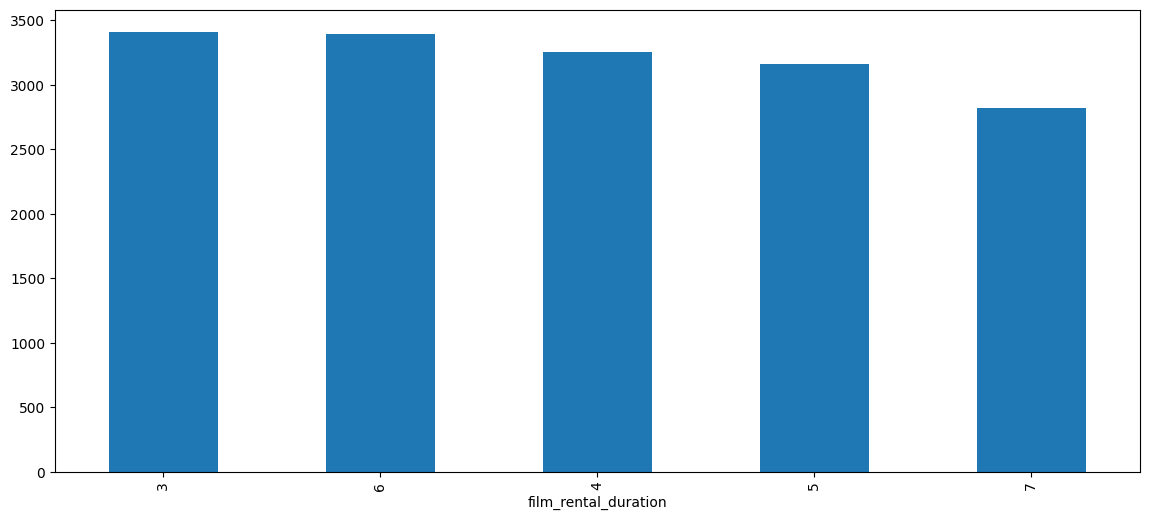

In [28]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14, 6))

In [29]:
df['film_rental_rate'].value_counts().head(1)

film_rental_rate
0.99    5652
Name: count, dtype: int64

<Axes: ylabel='count'>

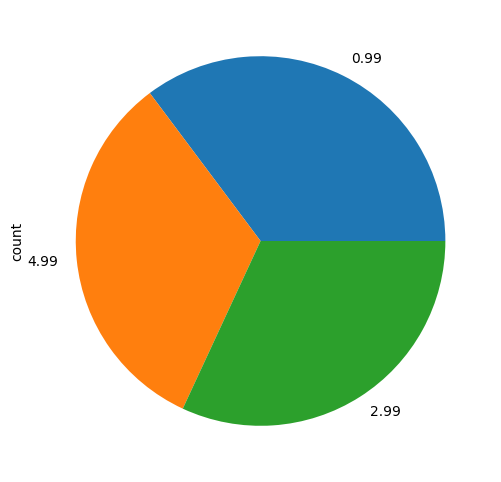

In [30]:
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: xlabel='film_rental_rate'>

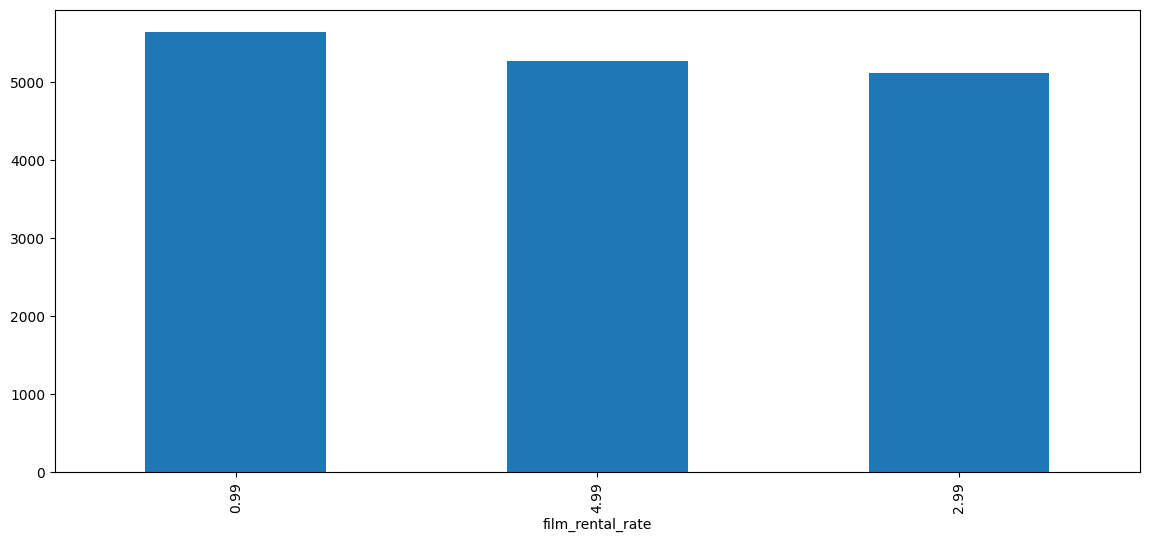

In [31]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14, 6))

In [32]:
df['film_replacement_cost'].value_counts()

film_replacement_cost
22.99    1044
27.99     958
21.99     912
29.99     868
12.99     864
20.99     863
14.99     821
13.99     803
11.99     749
25.99     740
26.99     737
10.99     720
28.99     716
18.99     696
17.99     691
23.99     690
9.99      684
19.99     657
16.99     639
24.99     633
15.99     559
Name: count, dtype: int64

<Axes: >

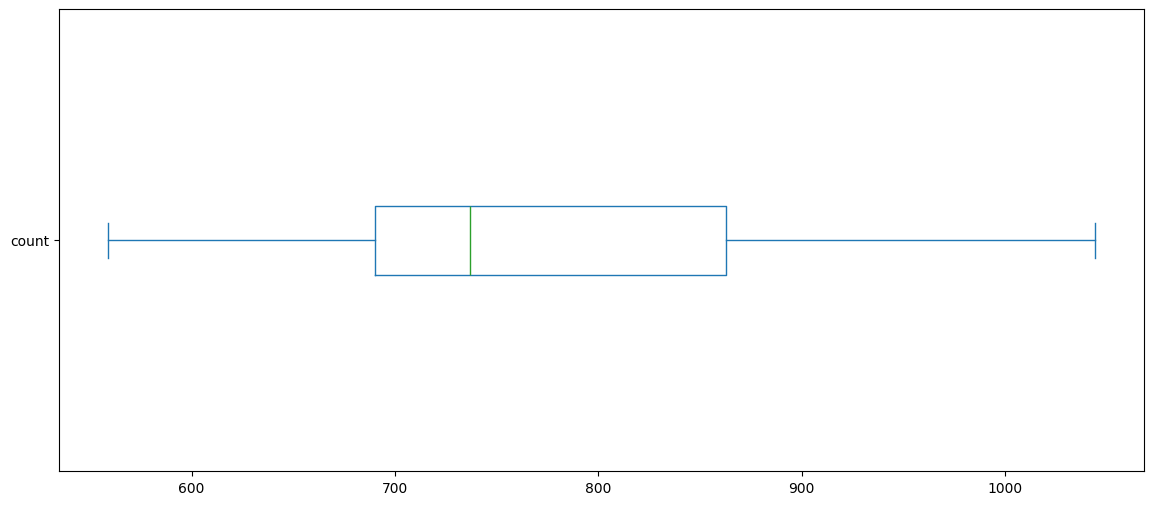

In [33]:
df['film_replacement_cost'].value_counts().plot(kind='box', vert=False, figsize=(14, 6))

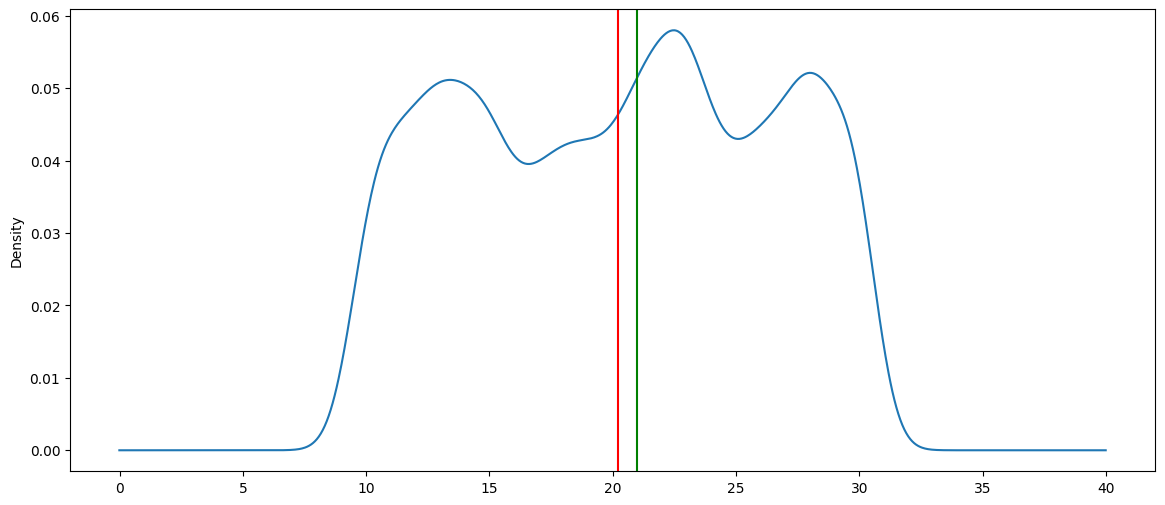

In [35]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14, 6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

In [36]:
df['film_rating'].value_counts()

film_rating
PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

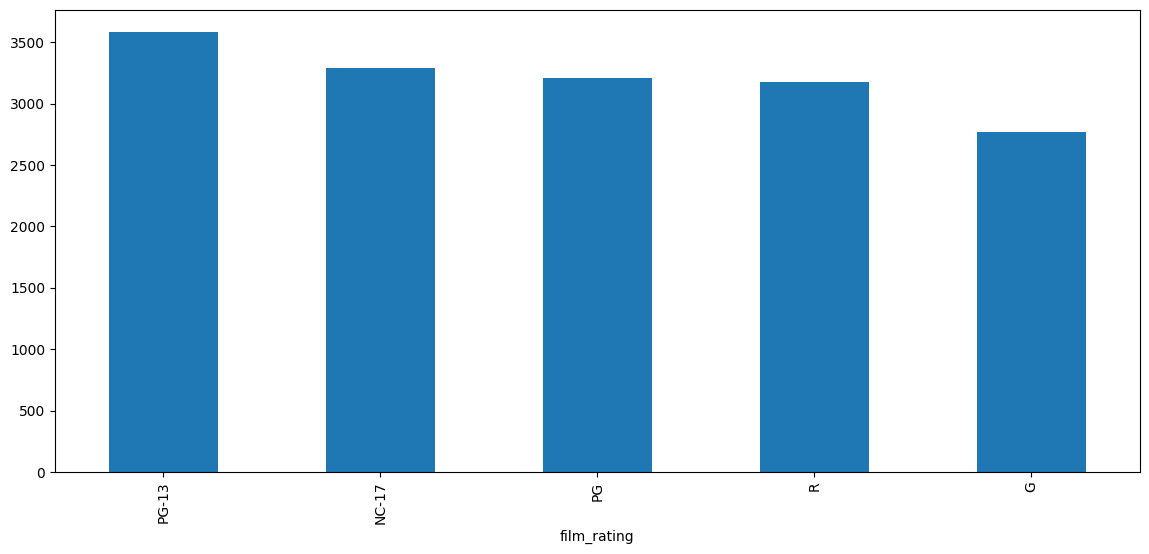

In [37]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14, 6))

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

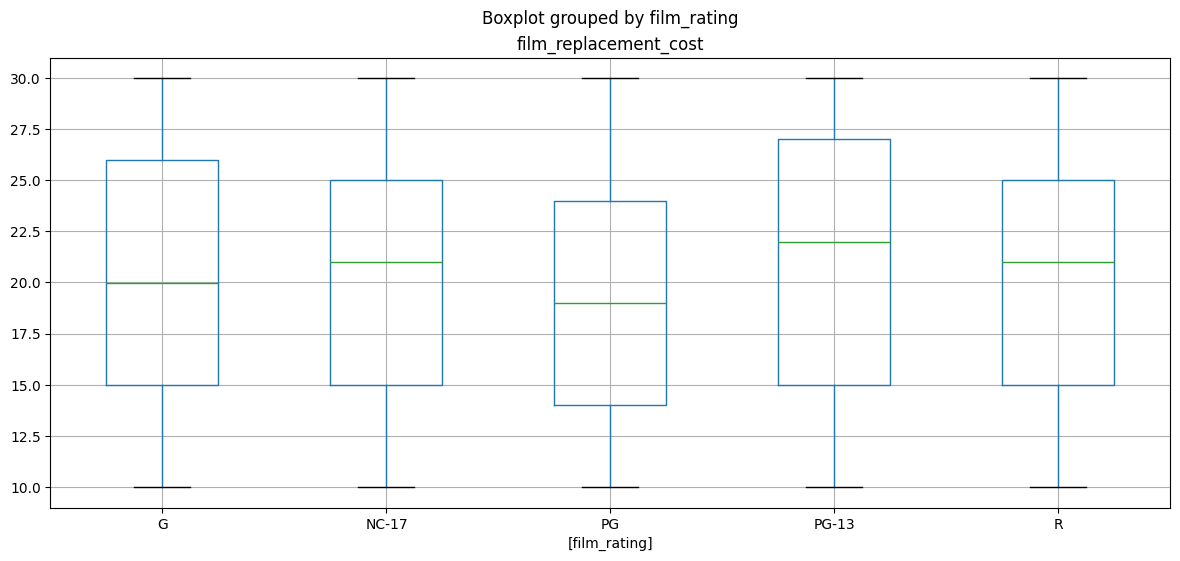

In [40]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14, 6))

In [47]:
df['rental_days'] = df[['return_date', 'rental_date']].apply(lambda x: (x.iloc[0] - x.iloc[1]).days, axis=1)

df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

In [48]:
df['rental_days'].mean()

np.float64(4.525944139713763)

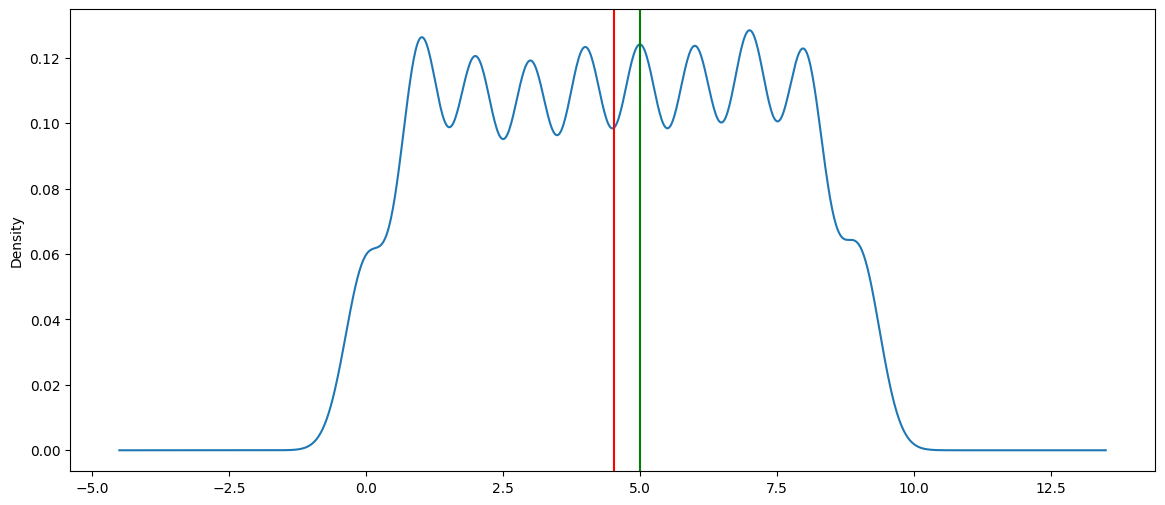

In [55]:
ax = df['rental_days'].plot(kind='kde', figsize=(14, 6))
ax.axvline(df['rental_days'].mean(), color='red')
ax.axvline(df['rental_days'].median(), color='green')

In [60]:
# df['rental_days'] = df[['return_date', 'rental_date']].apply(lambda x: (x.iloc[0] - x.iloc[1]).days, axis=1)

df['film_daily_rental_rate'] = df[['film_rental_rate', 'film_rental_duration']].apply(lambda x: (x.iloc[0] / x.iloc[1]), axis=1)
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

In [61]:
df['film_daily_rental_rate'].mean()

np.float64(0.6458262471655329)

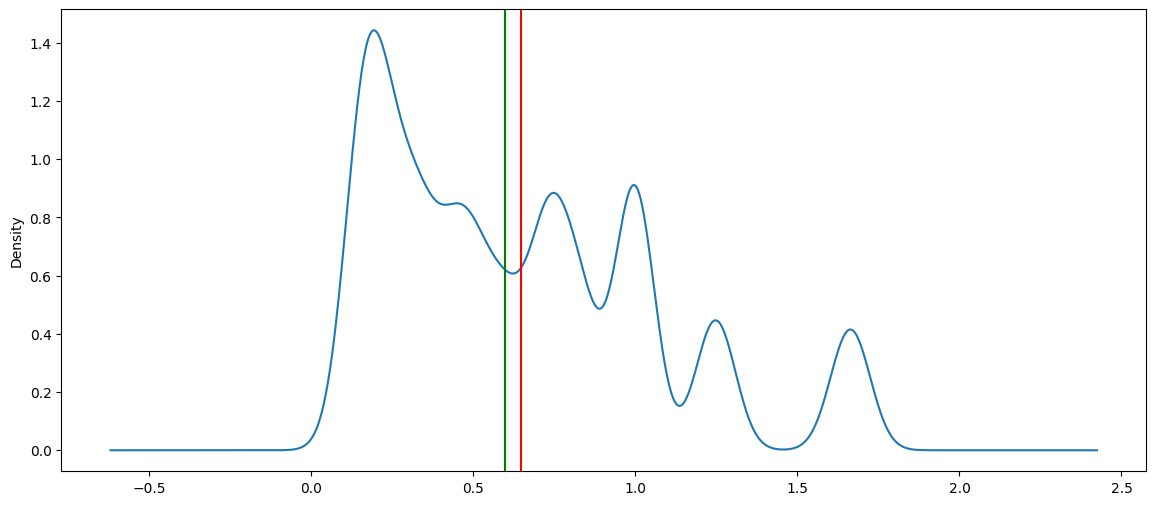

In [65]:
ax = df['film_daily_rental_rate'].plot(kind='kde', figsize=(14, 6))
ax.axvline(df['film_daily_rental_rate'].mean(), color="red")
ax.axvline(df['film_daily_rental_rate'].median(), color="green")

In [67]:
condition = df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()
df.loc[condition].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,0.141429


In [68]:
condition = df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()
df.loc[condition].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,1.663333


In [71]:
condition = df['rental_store_city'] == 'Lethbridge'
df.loc[condition].shape[0]

7923

In [72]:
condition = df['rental_store_city'] == 'Lethbridge'

df.loc[condition, 'film_rating'].value_counts()

film_rating
PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

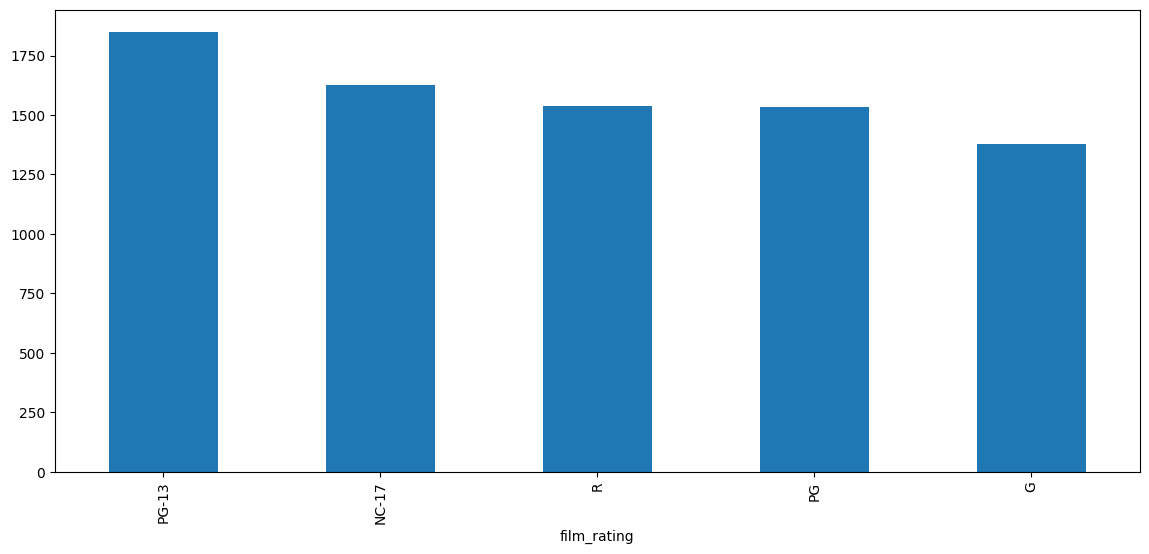

In [73]:
df.loc[condition, 'film_rating'].value_counts().plot(kind='bar', figsize=(14, 6))

In [76]:
condition = (df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)
df.loc[condition].shape[0]

3186

In [77]:
condition = (df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)
df.loc[condition].shape[0]

8444